## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

import pandas as pd
data = pd.read_csv("https://code.s3.yandex.net/datasets/credit_scoring_eng.csv")

data




In [6]:
import pandas as pd
credit_scoring = pd.read_csv("https://code.s3.yandex.net/datasets/credit_scoring_eng.csv")

credit_scoring[0:20]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [7]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [8]:
credit_scoring.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [9]:
credit_scoring[credit_scoring.duplicated(keep = False)].sort_values('dob_years')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
19321,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,NaN,second-hand car purchase
15892,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,NaN,second-hand car purchase
18328,0,NaN,29,bachelor's degree,0,married,0,M,employee,0,NaN,buy residential real estate
3452,0,NaN,29,bachelor's degree,0,married,0,M,employee,0,NaN,buy residential real estate
8629,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
13639,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,car
3609,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,housing
12389,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education
5865,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,NaN,transactions with my real estate


Findings from look at the data at certain random slices of data:
Data characteristics:
1. Each row contains records about the persons marital status, number of children, education level, employment level, gender,total income and why the person needs the loan also whether the person is a defaulter or not
2. 21525 rows and 12 columns, which means a total of 258300 total data points
3. Out of this missing values are there in days_employed and total_income.
4. The number of  missing values are the same for the two data points - hypothesis, wherever data is missing for days_employed 
   maybe data is also missing got total_employed
5. Data types at a cursory look seems to be in line with the variables 

Certain findings:
1. Education id is lower if the degree is higher
2. Family status is lowest when the person is married. 
3. Initial look shows 53 duplicate values

Few suspicious data points:
1. Negative day_employed
2. Max days employed  - 401755 which translates to 1100 odd years
2. Negative  number of children 
3. Age in dob_years 0


Purpose of the analysis: Determine whether the number of children and marital status of a customer impact the borrowers’ risk of defaulting a loan


Questions for the study:
1. Do customers with more number of kids have higher probabality of defaulting on the loan
2. Does marital status affect the capability to pay back loan

<div class="alert alert-success">

### Comment

Good job in start!  
Your conclusion looks realy nice!  
</div>

# Step 2. Data preprocessing

### Processing missing values

Issues to be addressed:
1. Identifying and replacing the missing values 
2. Studying and replacing  suspicious data points wherever possible

1. Identifying and replacing the missing values 

In [10]:
total_value_count = credit_scoring.count().sum()
total_value_count

253952

In [11]:
missing_values_total = credit_scoring.isnull().sum().sum()
missing_values_total

4348

In [12]:
missing_values_by_columns = credit_scoring.isnull().sum()
missing_values_by_columns    

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [13]:
total_rows = len(credit_scoring)
percentage_missing_data = (missing_values_by_columns /total_rows)*100
percentage_missing_data

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

In [14]:
#Is there any evident reason for the same number of missing values of both variables. Do these values belong to people who
#are currently not working

import pandas as pd  
credit_scoring = pd.read_csv("https://code.s3.yandex.net/datasets/credit_scoring_eng.csv")   
# creating bool series True for NaN values  
bool_series = pd.isnull(credit_scoring["days_employed"])      
credit_scoring[bool_series][56:100]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
541,0,NaN,57,secondary education,1,married,0,F,employee,0,NaN,second-hand car purchase
554,0,NaN,60,secondary education,1,married,0,M,employee,0,NaN,buy real estate
573,0,NaN,52,secondary education,1,civil partnership,1,F,civil servant,0,NaN,having a wedding
619,1,NaN,37,secondary education,1,civil partnership,1,F,business,1,NaN,wedding ceremony
627,1,NaN,34,bachelor's degree,0,civil partnership,1,M,employee,0,NaN,to have a wedding
645,0,NaN,52,secondary education,1,married,0,F,employee,0,NaN,property
646,0,NaN,44,secondary education,1,civil partnership,1,F,employee,1,NaN,buy residential real estate
649,0,NaN,45,secondary education,1,married,0,F,business,0,NaN,buy real estate
651,1,NaN,26,secondary education,1,civil partnership,1,F,business,0,NaN,transactions with commercial real estate
652,0,NaN,32,secondary education,1,unmarried,4,F,employee,0,NaN,buying a second-hand car


<div class="alert alert-warning">

### Comment

Typically, we load the dataset once in start of project and then work with him. it better to not load it again  
</div>

<div class="alert alert-warning">

### Making certain changes

1. Looking at each column individually to find out any erroneous data
2. Changing the negative values in the days_employed to positive values
3. Normalising the extremely large values in days_employed 
3. Total income - replacing the missing values - by grouping the data by income type
4. Standardising the education column - converting the Capital letters by small letters - to address the duplication of data
</div>

In [15]:
#Number of null values in the data
credit_scoring.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [16]:
#Duplicate data

In [17]:
credit_scoring.duplicated().sum()

54

In [18]:
credit_scoring.nunique()

children                8
days_employed       19351
dob_years              58
education              15
education_id            5
family_status           5
family_status_id        5
gender                  3
income_type             8
debt                    2
total_income        19348
purpose                38
dtype: int64

<div class="alert alert-warning">

### Comment

What are these unique values. Are there any discrepancies seen?
    1. Education id is 5 whereas education is 15, there is a mismatch here. The education column probably have the same data recorded differently, thereby increassing the number of unique values.
    2. 3 unique values for gender
    
</div>

In [19]:
credit_scoring['days_employed'].value_counts()
# Findings:
# 1. Large number of negative values.

-986.927316     1
-7026.359174    1
-4236.274243    1
-6620.396473    1
-1238.560080    1
               ..
-2849.351119    1
-5619.328204    1
-448.829898     1
-1687.038672    1
-582.538413     1
Name: days_employed, Length: 19351, dtype: int64

In [20]:
credit_scoring['days_employed'].min()

-18388.949900568383

In [21]:
credit_scoring['days_employed'].max() 
# Extremely large number, need to address these. 

401755.40047533

In [22]:
credit_scoring['children'].unique()
# Negative number of children and large number of kids 20, needs to be addressed

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [23]:
credit_scoring['education'].unique()
# Same category name is represented in 2 different ways, needs to be addressed

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [24]:
credit_scoring['dob_years'].unique()
# Age 0 appears only once, so keeping it as is as it might be the record is missing because it was
#given in the first place

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

In [25]:
credit_scoring[['income_type', 'days_employed', 'dob_years']].groupby('dob_years').agg(['count','nunique']).head()
#Large number of values in the age = 0. Explore this record more deeply so see if the age can be guestimated

income_type         days_employed        
                count nunique         count nunique
dob_years                                          
0                 101       4            91      91
19                 14       3            13      13
20                 51       3            46      46
21                111       3            93      93
22                183       5           166     166

In [26]:
credit_scoring_filtered = credit_scoring[credit_scoring['dob_years'] == 0]
credit_scoring_filtered.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Secondary Education,1,married,0,F,retiree,0,11406.644,car
149,0,-2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,-1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,-1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car


In [27]:
credit_scoring['gender'].unique()
# Not replacing as it might not b

array(['F', 'M', 'XNA'], dtype=object)

In [28]:
credit_scoring['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [29]:
credit_scoring['total_income'].value_counts()

17312.717    2
31791.384    2
42413.096    2
54857.666    1
26935.722    1
            ..
48796.341    1
34774.610    1
15710.698    1
19232.334    1
9591.824     1
Name: total_income, Length: 19348, dtype: int64

In [30]:
credit_scoring.duplicated().sum()

54

<div class="alert alert-warning">
1.Missing values
    a. Total_income and days_employed
    b. Age = 0
2. Erroneous values 
    a. Negative days of employment
    b. Negative values in number of children 
    c. Gender XNA
3. Duplicated values
    a. Obvious = 54
    b. However in the education type we the same education type , but represented by smaller letters and capital letters
    </div>

# Replacement method and reasons:

<div class="alert alert-warning">
1.Missing values
    a. Total_income - we will replace the total income by grouping the data by income type and replacing the total income based on the income type
    b. Days_employed - Converting all the negative values to positive values and then checking the mean/median values
    c. Identified 101 rows with age as 0. In future times would replace this value with mean of the income_type
  
2. Erroneous values 
    a. Negative days of employment - changing them to positive
    b. Negative values in number of children - replacing them with the nearest positive number
    c. 20 in the number of children - replacing it with 2 as it seems extra 0 was added while data entry 
    d. Gender XNA - keeping is as is, because maybe the customer did not want to declare their gender. And there is no reliance on this data. So I am not doing anything about it 
3. Duplicated values
    a. Obvious = 54
    b. However in the education type we the same education type , but represented by smaller letters and capital letters
</div>

In [31]:
credit_scoring['days_employed_positive'] = credit_scoring['days_employed'].abs()
credit_scoring

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,8437.673028
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,4024.803754
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,5623.422610
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,4124.747207
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,340266.072047
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,4529.316663
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,343937.404131
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,2113.346888
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,3112.481705


In [32]:
credit_scoring_sorted = credit_scoring.sort_values(by= 'days_employed_positive' , ascending = False)
credit_scoring_sorted.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
6954,0,401755.400475,56,secondary education,1,widow / widower,2,F,retiree,0,28204.551,housing renovation,401755.400475
10006,0,401715.811749,69,bachelor's degree,0,unmarried,4,F,retiree,0,9182.441,getting an education,401715.811749
7664,1,401675.093434,61,secondary education,1,married,0,F,retiree,0,20194.323,housing transactions,401675.093434
2156,0,401674.466633,60,secondary education,1,married,0,M,retiree,0,52063.316,cars,401674.466633
7794,0,401663.850046,61,secondary education,1,civil partnership,1,F,retiree,0,7725.831,wedding ceremony,401663.850046


In [33]:
days_employed_filter = credit_scoring['days_employed_positive'] >= 18250
credit_scoring_after_filter = credit_scoring[days_employed_filter]
credit_scoring_after_filter.head()

#Maximum age in data set is 70, assuming 50 years of employment, starting employment at 20 years


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,340266.072047
18,0,400281.136913,53,secondary education,1,widow / widower,2,F,retiree,0,9091.804,buying a second-hand car,400281.136913
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,46487.558,transactions with commercial real estate,338551.952911
25,0,363548.489348,67,secondary education,1,married,0,M,retiree,0,8818.041,buy real estate,363548.489348
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,27432.971,transactions with commercial real estate,335581.668515


In [34]:
#changing very large values by dividnig them by 24, assuming the person made an error while entering data
credit_scoring.loc[credit_scoring['days_employed_positive'] >= 18250, 'days_employed_positive'] = credit_scoring['days_employed_positive']/24


In [35]:
credit_scoring_sorted = credit_scoring.sort_values(by= 'days_employed_positive' , ascending = False)
credit_scoring_sorted.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
4299,0,-17615.563266,61,secondary education,1,married,0,F,business,0,19609.719,purchase of the house,17615.563266
6954,0,401755.400475,56,secondary education,1,widow / widower,2,F,retiree,0,28204.551,housing renovation,16739.808353
10006,0,401715.811749,69,bachelor's degree,0,unmarried,4,F,retiree,0,9182.441,getting an education,16738.158823
7664,1,401675.093434,61,secondary education,1,married,0,F,retiree,0,20194.323,housing transactions,16736.462226
2156,0,401674.466633,60,secondary education,1,married,0,M,retiree,0,52063.316,cars,16736.436110


In [36]:
credit_scoring['days_employed_positive'].mean()

4640.730487138492

In [37]:
credit_scoring['days_employed_positive'].median()

2194.2169684631217

In [38]:
# Replacing the null values in days-employed by income type and median
credit_scoring['days_employed_positive'] = credit_scoring.groupby('income_type')['days_employed_positive'].apply(lambda x:x.fillna(x.median()))


<div class="alert alert-success">

### Comment 2  

Perfect
</div>

In [39]:
# Replacing the null values in total_income by median of data grouped by income type

In [40]:
credit_scoring['total_income'] = credit_scoring.groupby('income_type')['total_income'].apply(lambda x:x.fillna(x.median()))

In [41]:
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,8437.673028
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,4024.803754
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,5623.422610
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,4124.747207
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,14177.753002


<div class="alert alert-success">

### Comment 2  

Good job
</div>

In [42]:
#Null values in column days_employed_positive (new column with positive values of days_employed) 
#and total income are replaced by grouping the data
credit_scoring.isnull().sum()

children                     0
days_employed             2174
dob_years                    0
education                    0
education_id                 0
family_status                0
family_status_id             0
gender                       0
income_type                  0
debt                         0
total_income                 0
purpose                      0
days_employed_positive       0
dtype: int64

In [43]:
# Replacing the null values in total_income by income type

dob_years_filter = (credit_scoring['dob_years'] == 0)
credit_scoring_after_filter = credit_scoring[dob_years_filter]
credit_scoring_after_filter.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
99,0,346541.618895,0,Secondary Education,1,married,0,F,retiree,0,11406.644,car,14439.234121
149,0,-2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions,2664.273168
270,3,-1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation,1872.663186
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property,16577.356876
1040,0,-1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car,1158.029561


In [44]:
grouped_credit_scoring = credit_scoring.groupby("income_type")['dob_years']
#Group by "dob_years#" column

median_dob_years = grouped_credit_scoring.median()
median_dob_years

income_type
business                       39.0
civil servant                  40.0
employee                       39.0
entrepreneur                   42.5
paternity / maternity leave    39.0
retiree                        60.0
student                        22.0
unemployed                     38.0
Name: dob_years, dtype: float64

In [45]:
grouped_credit_scoring = credit_scoring.groupby("income_type")['dob_years']
#Group by "dob_years#" column

mean_dob_years = grouped_credit_scoring.mean()
mean_dob_years


income_type
business                       39.697542
civil servant                  40.636737
employee                       39.821027
entrepreneur                   42.500000
paternity / maternity leave    39.000000
retiree                        59.063019
student                        22.000000
unemployed                     38.000000
Name: dob_years, dtype: float64

In [46]:
credit_scoring['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

<div class="alert alert-warning">
I am not replacing the 0 value in the dob_years as people might have not given in the age . Since this parameter is not needed for the analysis I am not replacing it. In case it was a vital variable I would have replaced the value zero by mean of dob_years in grouped by income_type 
</div>

 Studying and replacing  suspicious data points wherever possible

In [47]:
credit_scoring.loc[credit_scoring['children'] == -1,'children']= 1
credit_scoring.loc[credit_scoring['children'] == 20,'children']= 2

credit_scoring['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

We have a 0 in the age column (dob_years), however that data I am not replacing since that might not be missing at random,
the people might have chosen not to declare their age.

<div class="alert alert-success">

### Comment 2  

Yeah, right
</div>

# Conclusion:

<div class="alert alert-danger">

1. Days_employed
    1.1 All negative values were changed to positive - new column created with only positive values
    1.2 Very large values were assumed to be errors, the person putting in data might have put in number of hours instead of days of emplyment. These large values were divided by 24 to convert them into number of days
    1.3 Mean and median were computed
    1.4 Replacement of missing values was done by taking into consideration the income type
    1.5 Values were replaced by median
2. Total_income 
    1.1 Replacement of missing values was done based on the income type 
    1.2 Values were replaced by median 
3. Dob_years 
    1.1 Where dob_years is 0 I am not replacing it as it is not used for the analysis. however I would have replaced this value with the mean of the dob_years ,grouped by income type
4. Children 
    1.1 Negative number replaced by positive number
    1.2 Large number like 20 was replaced by 2  
</div>

<div class="alert alert-danger">

### Comment: 

So, it`s cool that you ve deeply researched your data. But, there are some issues:
- gaps in days_employed: It would be better to fill in the gaps more detailed. Yes, Gaps for example can be filled with one median / mean or zero, but for educational purposes it would be better to handle more carefully. Moreover, there is nothing terrible there. First Check negative values and correct them. Then you should pay attention to too large values (in a large number of rows) - when recalculated for years, they give 800-1100 years of experience (simply dividing by 365!), Which is unacceptable. Then maybe these are not days at all (not all rows, but only these "giants") ?! Perhaps it is enough to simply divide large values (by 24) and that's it, the data (available) will be ready (processed). And about filling in the gaps: ONLY now, when all the available values are correct, it will be possible to think about how to fill in the gaps ... here you can customize the filling of the gaps, for example, by the type of employment. Look... if you fill in the gaps with one common median (average), then there will be borrowers who have age more experience. 
    
- gaps in income: it would be acceptable to fill in one common average / median or zero if the data did not contain any other fields by which borrowers can be divided. Do you think entrepreneurs and students will have the same average / median income? ;)
- there can exist not only Nan/Null-gaps. 0-values are also gaps. Please find them and decide what to do. It doesnt mean that you should transform them, but its very importand to find out them.
</div>

<div class="alert alert-success">

### Comment 2  

All done. 
</div>

# Data type replacement

In [48]:
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   children                21525 non-null  int64  
 1   days_employed           19351 non-null  float64
 2   dob_years               21525 non-null  int64  
 3   education               21525 non-null  object 
 4   education_id            21525 non-null  int64  
 5   family_status           21525 non-null  object 
 6   family_status_id        21525 non-null  int64  
 7   gender                  21525 non-null  object 
 8   income_type             21525 non-null  object 
 9   debt                    21525 non-null  int64  
 10  total_income            21525 non-null  float64
 11  purpose                 21525 non-null  object 
 12  days_employed_positive  21525 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


1. All the quantitative variables are in the int or float format and therefore mathematic operations can be conducted. 
2. Number of days_employed can be converted into a whole number , but this column we have already identified to be a problematic column so I am leaving it as is. 
3. We can reduce the size of the file by change the int 64 to int 32 to make the file easier to work on. 

In [49]:
#Converting int 64 to int 32
credit_scoring = credit_scoring.astype({col: 'int32' for col in credit_scoring.select_dtypes('int64').columns})

# int64 columns have been converted to int32
print(credit_scoring.dtypes)

children                    int32
days_employed             float64
dob_years                   int32
education                  object
education_id                int32
family_status              object
family_status_id            int32
gender                     object
income_type                object
debt                        int32
total_income              float64
purpose                    object
days_employed_positive    float64
dtype: object


<div class="alert alert-danger">
Changes done to days_employed_positive and total_income - converted them to integers
</div>

In [50]:
credit_scoring['total_income'] = credit_scoring['total_income'] .astype(int)

In [51]:
credit_scoring['days_employed_positive']= credit_scoring['days_employed_positive'] .astype(int)

In [52]:
credit_scoring.dtypes

children                    int32
days_employed             float64
dob_years                   int32
education                  object
education_id                int32
family_status              object
family_status_id            int32
gender                     object
income_type                object
debt                        int32
total_income                int32
purpose                    object
days_employed_positive      int32
dtype: object

<div class="alert alert-danger">

### Comment

Ok, no worries. Something went wrong.
- what about total_income... Do we need numbers after dot?
  
</div>

<div class="alert alert-success">

### Comment 2  

Pretty good
</div>

### Processing duplicates

In [53]:
#Q1. Are there duplicate values in the data? 
credit_scoring_dupl = credit_scoring.duplicated().any()
credit_scoring_dupl

True

In [54]:
credit_scoring['education'] = credit_scoring['education'].str.lower()

In [55]:
credit_scoring['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [56]:
#Q2. How many duplicate values are thre?
credit_scoring[credit_scoring.duplicated(keep = False)].sort_values('dob_years')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
20297,1,NaN,23,secondary education,1,civil partnership,1,F,employee,0,22815,to have a wedding,1573
8853,1,NaN,23,secondary education,1,civil partnership,1,F,employee,0,22815,to have a wedding,1573
15892,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,22815,second-hand car purchase,1573
19321,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,22815,second-hand car purchase,1573
3452,0,NaN,29,bachelor's degree,0,married,0,M,employee,0,22815,buy residential real estate,1573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,18962,transactions with my real estate,15217
9528,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,18962,transactions with my real estate,15217
9604,0,NaN,71,secondary education,1,civil partnership,1,F,retiree,0,18962,having a wedding,15217
7938,0,NaN,71,secondary education,1,civil partnership,1,F,retiree,0,18962,having a wedding,15217


### Conclusion

<div class="alert alert-danger"> 
1. A total of 137 rows have duplicated data. 
2. Duplicates were removed by drop duplicate method
3. A total of 54 duplicates were identified when we observed the data in the begining however we missed the other duplicates that were present due to the different ways of writing the same thing in education column
4. Changed the education column string to lower case
5. Then deleted the duplicate values. 
</div>

<div class="alert alert-danger">

### Comment

There are a bit more than 54 duplicates. Lets have a look at education column. the values here are entered in different letters
   
</div>

In [57]:
credit_scoring[credit_scoring.duplicated(keep = False)].sort_values('dob_years')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
20297,1,NaN,23,secondary education,1,civil partnership,1,F,employee,0,22815,to have a wedding,1573
8853,1,NaN,23,secondary education,1,civil partnership,1,F,employee,0,22815,to have a wedding,1573
15892,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,22815,second-hand car purchase,1573
19321,0,NaN,23,secondary education,1,unmarried,4,F,employee,0,22815,second-hand car purchase,1573
3452,0,NaN,29,bachelor's degree,0,married,0,M,employee,0,22815,buy residential real estate,1573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,18962,transactions with my real estate,15217
9528,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,18962,transactions with my real estate,15217
9604,0,NaN,71,secondary education,1,civil partnership,1,F,retiree,0,18962,having a wedding,15217
7938,0,NaN,71,secondary education,1,civil partnership,1,F,retiree,0,18962,having a wedding,15217


In [58]:
# length after adding row 
length=  len(credit_scoring)
length

21525

In [59]:
# sorting by first name 
credit_scoring.sort_values("dob_years", inplace=True) 
credit_scoring

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_positive
6859,1,-260.992722,0,some college,2,civil partnership,1,F,employee,0,20519,buy real estate,260
16042,2,-176.404487,0,secondary education,1,married,0,F,employee,0,22010,housing,176
7034,0,366067.781030,0,bachelor's degree,0,unmarried,4,F,retiree,0,42099,education,15252
21179,2,-108.967042,0,bachelor's degree,0,married,0,M,business,0,38512,building a real estate,108
4147,0,-3549.117333,0,secondary education,1,divorced,3,M,employee,0,17300,buy residential real estate,3549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,0,344623.836105,74,secondary education,1,married,0,M,retiree,0,8760,transactions with my real estate,14359
4895,0,341528.126150,74,bachelor's degree,0,married,0,F,retiree,0,21589,purchase of my own house,14230
19642,0,380150.387046,74,secondary education,1,widow / widower,2,F,retiree,0,7214,car purchase,15839
11532,0,-6682.867814,74,secondary education,1,civil partnership,1,F,employee,0,15831,to have a wedding,6682


In [60]:
# dropping duplicate values 
credit_scoring.drop_duplicates(keep=False,inplace=True) 


In [61]:
# reviewers code
credit_scoring.duplicated().sum()

0

<div class="alert alert-danger">

### Comment 2

Duplicates are still here. We need to drop them
   
</div>

<div class="alert alert-success">

### Comment 3

Done!
   
</div>

### Categorizing Data

Categorising data

In [62]:
#Renaming the columns names to give clear idea what is the data in the columns
credit_scoring.set_axis(['children_total','days_employed', 'age_years', 'education_level', 'education_id', 'family_status', 'family_status_id', 'gender', 'income_type', 'default_status', 'total_income',  'loan_purpose', 'days_employed_final'], axis = 'columns', inplace = True)

<div class="alert alert-warning">
Categorising data :
    1. Kids and no kids
    2. Married + living together and single
    3. Creating categories based on total_income
    4. Clubbing the purpose of loan into distinct categories
   
</div>
    

In [63]:
def children_category(children_total):
    
    """
    The function divides the data into 2 categories
    1. People who have kids
    2. People who have no kids 
    """
    
    if children_total > 0:
        return 'have children'
    else :
        return 'no children'
credit_scoring['children_total_category'] = credit_scoring['children_total'].apply(children_category)

In [64]:
credit_scoring['family_status'].unique()

array(['civil partnership', 'married', 'unmarried', 'divorced',
       'widow / widower'], dtype=object)

In [65]:
def marital_status(family_status):
 
    """
    The function divides the data into 2 categories
    1. People living with somone

    2. People living alone
    """
    if family_status == 'married':
        return 'not single'
    if family_status == 'civil partnership':
        return 'not single'
    if family_status == 'widow / widower':
        return 'widow'
    if family_status == 'divorced':
        return 'single' 
    if family_status == 'unmarried':
        return 'single'
credit_scoring['family_status_category'] = credit_scoring['family_status'].apply(marital_status)

family_status	  Data breakup	Defauter breakup	Defaulter% for row
civil partnership	19,4%	    22%	                 9,3%
      divorced	    5,6%        5%	                 7,1%
married	            57,5%	    53%	                 7,5%
unmarried	        13,1%	    16%	                 9,8%
widow / widower	    4,5%	    3,6%	             6,6%
	100,0%	100%	8,1%


Findings:
1. Unmarried people and people with partners are more likely to default on the loan than others

<div class="alert alert-warning">

### Comment 2

We alreary have good categories in children and family_status. Why did you decide do creating new?
Ekta comment : Understood.    
</div>

In [66]:
#Categorising the income group into 4 groups : low , low middle, high middle and high based on the total monthly income
def income_group(total_income):
    """
    The function returns the income group according to the total_income, using the following rules:
    —'low ' for total_income <= 17000
    —'low_middle ' for 17000< age <= 23000
     —'high_middle' for 23000< age <= 32000
    —'high' for all other cases
    """
    
    if total_income <= 17000:
        return 'low'
    if total_income <= 23000:
        return 'low middle'
    if total_income <= 32000:
        return 'high middle'
    if total_income > 32000:
        return 'high'
    

credit_scoring['total_income_category'] = credit_scoring['total_income'].apply(income_group)

In [67]:
credit_scoring['total_income_category'].value_counts()

low middle     5701
high middle    5404
low            5218
high           5065
Name: total_income_category, dtype: int64

<div class="alert alert-success">

### Comment 2
Good
   
</div>

In [68]:
credit_scoring_pivot_loan_purpose = credit_scoring.pivot_table(index='loan_purpose', columns='default_status',values='income_type', aggfunc='count')
credit_scoring_pivot_loan_purpose

default_status,0,1
loan_purpose,,
building a property,564,54
building a real estate,574,48
buy commercial real estate,611,47
buy real estate,575,43
buy residential real estate,564,41
buying a second-hand car,441,36
buying my own car,459,46
buying property for renting out,597,52
car,451,42


In [69]:
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english') 

for word in credit_scoring.loan_purpose:
    print('Source word - {}, after stemming - {}'.format(word, english_stemmer.stem(word))) 

Source word - buy real estate, after stemming - buy real est
Source word - housing, after stemming - hous
Source word - education, after stemming - educ
Source word - building a real estate, after stemming - building a real est
Source word - buy residential real estate, after stemming - buy residential real est
Source word - to have a wedding, after stemming - to have a wed
Source word - to get a supplementary education, after stemming - to get a supplementary educ
Source word - housing renovation, after stemming - housing renov
Source word - wedding ceremony, after stemming - wedding ceremoni
Source word - to get a supplementary education, after stemming - to get a supplementary educ
Source word - property, after stemming - properti
Source word - housing, after stemming - hous
Source word - car, after stemming - car
Source word - university education, after stemming - university educ
Source word - having a wedding, after stemming - having a wed
Source word - buying my own car, after s

In [70]:
# categorising the purpose for loan into 4 categories: Automobile, Education, House/Real Estate, Wedding
def purpose_category(purpose):
    if "car" in purpose:
        return 'Automobile'
    if "educa" in purpose:
        return 'Education'
    if "universit" in purpose:
        return 'Education'
    if "propert" in purpose:
        return 'House/Real Estate'
    if "estat" in purpose:
        return 'House/Real Estate'
    if "hous" in purpose:
        return 'House/Real Estate'
    if "weddi" in purpose:
        return 'Wedding'
credit_scoring['loan_purpose_1'] = credit_scoring['loan_purpose'].apply(purpose_category)
#credit_scoring

In [71]:
credit_scoring['loan_purpose_1'].value_counts()

House/Real Estate    10784
Automobile            4297
Education             4004
Wedding               2303
Name: loan_purpose_1, dtype: int64

<div class="alert alert-success">

### Comment 2
Good
   
</div>

loan_purpose_1	Data breakup	Defauter breakup	Defaulter% for row
Automobile	     20,1%	         23,1%	             10,3%
Education	      18,7%         21,3% 	             10,2%
House/Real Estate	50,4%	     44,9%	             7,8%
Wedding	            10,9%	      10,7%	             8,7%
Total	              100,0%	100,0%	             8,8%


1. Most of the population takes loans for house purchase. 
2. The people who buy automobile and education tend to default more on the loan . 

Classifying data by income groups into 4 categories. 

income_group	Data breakup	Defauter breakup	Defaulter% for row
        high	23,6%	         20,6%	             7,6%
    high middle	32,1%	         33,9%	             9,4%
    low	        24,3%	         23,5%	             8,5%
low middle	    20,0%	         22,0%	             9,8%
Total	        100,0%	         100,0%	             8,8%


<div class="alert alert-warning">
 Conclusion
 1. The data was grouped by :
        a. Children_total into 2 categories - people with kids and people without kids
        b. Family_Status - 2 categories - Living with someone or alone
        c. Total_income - 4 categories - Low, low middle, high middle and high
        d. The loan purpose column was grouped into 4  groups - Automobile, education, real/house purchase and wedding. 
    
</div>

<div class="alert alert-warning">

### Comment

The categorization of the loan goals and income is correct. But when creating categories, there is no point in looking at the debt column. We need this column in the next paragraph.    
</div>

<div class="alert alert-warning">

### Changes
the data was categorised by 4 parameters
    1. Total income
    2. Marital status
    3. Children 
    4. Purpose of loan 
    

The categorization of the loan goals and income is correct. But when creating categories, there is no point in looking at the debt column. We need this column in the next paragraph.    
</div>

### Step 3. Answer these questions

In [72]:
credit_scoring_pivot = credit_scoring.pivot_table(index= ['children_total_category'], columns='default_status',values='total_income', aggfunc='count')
credit_scoring_pivot


default_status,0,1
children_total_category,,
have children,6672,678
no children,12975,1063


In [73]:
credit_scoring.groupby('children_total_category')['default_status'].mean()*100


children_total_category
have children    9.224490
no children      7.572304
Name: default_status, dtype: float64

<div class="alert alert-danger">
- Is there a relation between having kids and repaying a loan on time? -
Yes there exists a relationship between having children and repaying loan on time
1. People with no children contribute almost 66% to the data and their defaulting chances is just 7.5% as against the percentage contrribution of the total  of 8.1%
2. it can be concluded that the chances that people will default depends on whether they have children. 
</div>

In [74]:
credit_scoring_pivot = credit_scoring.pivot_table(index= ['children_total'], columns='default_status',values='total_income', aggfunc='count', fill_value = 0)
credit_scoring_pivot

default_status,0,1
children_total,,
0,12975,1063
1,4400,445
2,1923,202
3,303,27
4,37,4
5,9,0


In [75]:
credit_scoring.groupby('children_total')['default_status'].mean()*100

children_total
0    7.572304
1    9.184727
2    9.505882
3    8.181818
4    9.756098
5    0.000000
Name: default_status, dtype: float64

### Conclusion

<div class="alert alert-danger">
1. The data has 66% people with no children however the breakup of the defaulters show, that the contribution by people who have no children is just 61%. 
2. Overall default percentage to total is 8.1%.
3. Percentage to category total is highest for people with 4 kids :9.8% ,followed by people with 2 children with default percentage of 9.1%.
4. The people with no children have the lowest percentage of defaulters with 7.5%
5. The defaulter percentage is 0% however it needs to be noted in total numbers their contribution to the total data set is neglible.
3.Yes there is a corelation between having kids and defaulting on loans
</div>

<div class="alert alert-danger">

### Comment 2
Sorry, we need to do it (calculate % defaulter) by using python, not excel!
   
</div>

<div class="alert alert-danger">

### Comment

- Sorry, but there are no any calculations. But you ve already done it above. Your "credit_scoring_pivot_Children" are show the answer nedded here.
- please try to be more detailed. Since we want to be named analytics we should incude in our conclusions all information what we get by coding. It could be better to describe all categories we researched (0,1,2,3...)
 
</div>

<div class="alert alert-success">

### Comment 3

Perfect!
   
</div>

- Is there a relation between marital status and repaying a loan on time?
1. Yes there exists a relationship between marital status and repaying loans

In [76]:
credit_scoring.groupby('family_status_category')['default_status'].mean()*100

family_status_category
not single    8.028975
single        8.970515
widow         6.576200
Name: default_status, dtype: float64

In [77]:
credit_scoring_pivot = credit_scoring.pivot_table(index= ['family_status'], columns='default_status',values='total_income', aggfunc='count', fill_value = 0)
credit_scoring_pivot

default_status,0,1
family_status,,
civil partnership,3740,388
divorced,1110,85
married,11369,931
unmarried,2533,274
widow / widower,895,63


In [78]:
credit_scoring.groupby('family_status')['default_status'].mean()*100

family_status
civil partnership    9.399225
divorced             7.112971
married              7.569106
unmarried            9.761311
widow / widower      6.576200
Name: default_status, dtype: float64

family_status	0	1	   Total	Databreakup	Defaulter breakup	% of defaulter
not single	  15238	1319   16557	76,9%	    75,8%	           8,0%
single	      4546	422	   4968	    23,1%	    24,2%	           8,5%
	          19784	1741   21525	100%	    100%	           8,1%


family_status	0	  1	     Total	   Databreakup	Defaulter breakup	% of defaulter
not single	  15238	  1319	 16557	   76,9%	     75,8%	             8,0%
single	       3649	  359	 4008	   18,6%	     20,6%	             9,0%
widow	        897	  63	 960	    4,5%	     3,6%	             6,6%
              19784	  1741	 21525	    100,0%	     100,0%	             8,1%
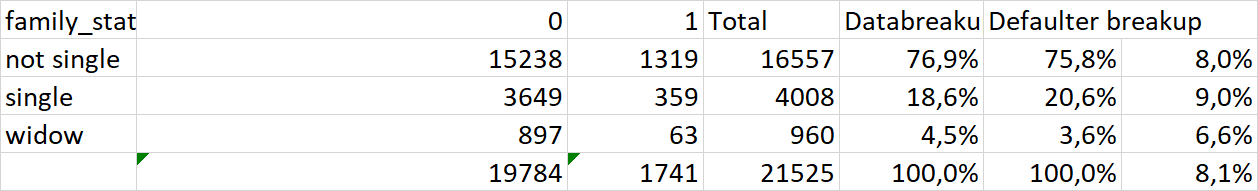


<div class="alert alert-danger">
1.Yes there exists a relation between marital status and defaulting on loans.
2. Married people contribute highest to the total data, however their chances to default are lower than unmarried people. and also lower than the average defaulting percentage.
3. The people who are unmarried and in civil partnership have a higher contribution of defaulters , with 9.7% and 9.2%
4. Divorced people also have similar percentages of defaulters as married people with 7.1%
5. Widowers have the lowest defaulter percentages
    
</div>

### Conclusion

1. Single people are more likely to default on the paying the loan based on the past data
2. The overall average default % is 8.1% whereas for singles it is as high as 9%
3. Widows are least likely to default on low payments, however the volume of data for this category is low

<div class="alert alert-danger">

### Comment

The same issue. Show your calculations here. Then we need to describe all categories we explored.  What is the difference between them. The answer shoul be not " yes, it is" or "Not, correlation does not exist". People will not stopped getting a loan. 
 
</div>

<div class="alert alert-danger">

### Comment 2
Okay, no worries. let's just return the categories to their previous form and see % defoult them. they was better.... and please, use python
   
</div>

<div class="alert alert-success">

### Comment 3

Done!   
</div>

- Is there a relation between income level and repaying a loan on time?
Yes there exists a relationship between the income level and repaying loan

People with average income level are more likely to default on the loan 

In [79]:
credit_scoring_pivot = credit_scoring.pivot_table(index= 'total_income_category', columns='default_status',values='income_type', aggfunc='count')
credit_scoring_pivot

default_status,0,1
total_income_category,,
high,4707,358
high middle,4946,458
low,4809,409
low middle,5185,516


In [80]:
credit_scoring.groupby('total_income')['default_status'].mean()*100

total_income
3306      100.0
3392        0.0
3418        0.0
3471        0.0
3503        0.0
          ...  
273809      0.0
274402      0.0
276204      0.0
352136    100.0
362496      0.0
Name: default_status, Length: 15389, dtype: float64

In [81]:
credit_scoring.groupby('total_income_category')['default_status'].mean()*100

total_income_category
high           7.068115
high middle    8.475204
low            7.838252
low middle     9.051044
Name: default_status, dtype: float64

total_income	0	   1	Total	Databreakup	Defaulter breakup	Default percentage
high	       4707	  358	5065	24%	         21%	              7,1%
high middle	   4964	  458	5422	25%	         26%	              8,4%
low	           4809   409	 5218	24%	         23%	              7,8%
low middle	   5304	  516	5820	27%	         30%	              8,9%
	          19784	  1741	21525	100%	     100%	              8,1%
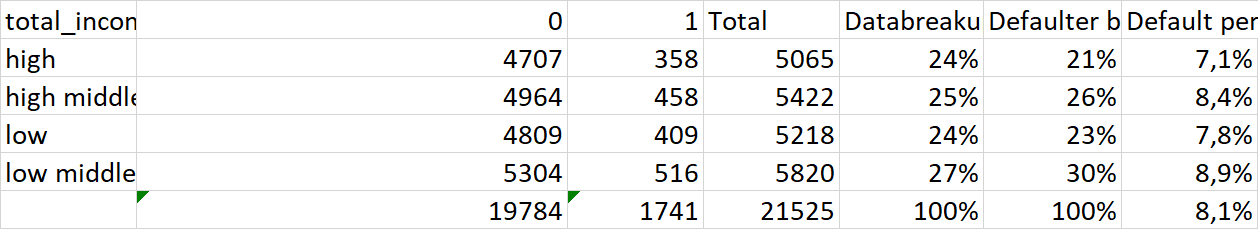

### Conclusion
1. Yes there is a link betweeen the income level and defaulting tendency
2. The people who have middle income level, 23000 to 32000 have a higher chance of defaulting on loan as against the low income and the high level group. 
2. The people who have high income levels and low income levels have lower than average defaulter percentage, with 7 and 7.8% respectively as against the average of 8.1%

<div class="alert alert-danger">

### Comment

The same issue. 
 
</div>

<div class="alert alert-danger">

### Comment

Ok, "default percent" are calculated correctly. But there is no any python-calculations.
- and please, describe all categories and their differences, not only best one
 
</div>

<div class="alert alert-success">

### Comment 3

Good!
   
</div>

How do different loan purposes affect on-time repayment of the loan?

- With this data there seems to be a relationship however the default status is based on their past data, we are not sure on what loan they had defaulted for. 
- Purely looking at this data it looks like people applying for automobile loan and education  have a higher percentage of defaulters. 

In [82]:
credit_scoring_pivot = credit_scoring.pivot_table(index= 'loan_purpose_1', columns='default_status',values='total_income', aggfunc='count')
credit_scoring_pivot 

default_status,0,1
loan_purpose_1,,
Automobile,3894,403
Education,3634,370
House/Real Estate,10002,782
Wedding,2117,186


loan_purpose_1	    0	1	      Total	  Databreakup	Defaulter breakup	% default 
Automobile	        3912	403	  4315	   20%	        23% 	               9%
Education	        3652	370	  4022	   19%	        21%	                   9%
House/Real Estate	10058	782	  10840	   50%	        45%	                   7%
Wedding	            2162	186	   2348	   11%	        11%	                   8%
Total	           19784	1741   21525   100%	        100%	               8%
1. People take loans fro buying property, contributed 50% to the total
2. However the chances they would default on a loan based on the previous data shows that the people who take automobile or education loan are more likely to default. 
3. We can explore whether this phenomena is related to the age group. However since ióur data in age group is not corrected (101 - 0 values) it might not give us a clear picture with our data.


In [83]:
credit_scoring_pivot = credit_scoring.pivot_table(index= ['family_status_category', 'loan_purpose_1'],  columns='default_status',values='total_income', aggfunc='count')
credit_scoring_pivot 

default_status                               0    1
family_status_category loan_purpose_1              
not single             Automobile         2882  280
                       Education          2715  276
                       House/Real Estate  7395  577
                       Wedding            2117  186
single                 Automobile          814  103
                       Education           735   79
                       House/Real Estate  2094  177
widow                  Automobile          198   20
                       Education           184   15
                       House/Real Estate   513   28

		0	1	Total	%share to subtotal	% share of defaulter
not single	Automobile	2898	280	3178	19,2%	8,8%
	Education	2731	276	3007	18,2%	9,2%
	House/Real Estate	7447	577	8024	48,5%	7,2%
	Wedding	2162	186	2348	14,2%	7,9%
		15238	1319	16557	100,0%	8,0%
single	Automobile	816	103	919	22,9%	11,2%
	Education	737	79	816	20,4%	9,7%
	House/Real Estate	2096	177	2273	56,7%	7,8%
		3649	359	4008	100,0%	9,0%
widow	Automobile	198	20	218	22,7%	9,2%
	Education	184	15	199	20,7%	7,5%
	House/Real Estate	515	28	543	56,6%	5,2%
		897	63	960	100,0%	6,6%
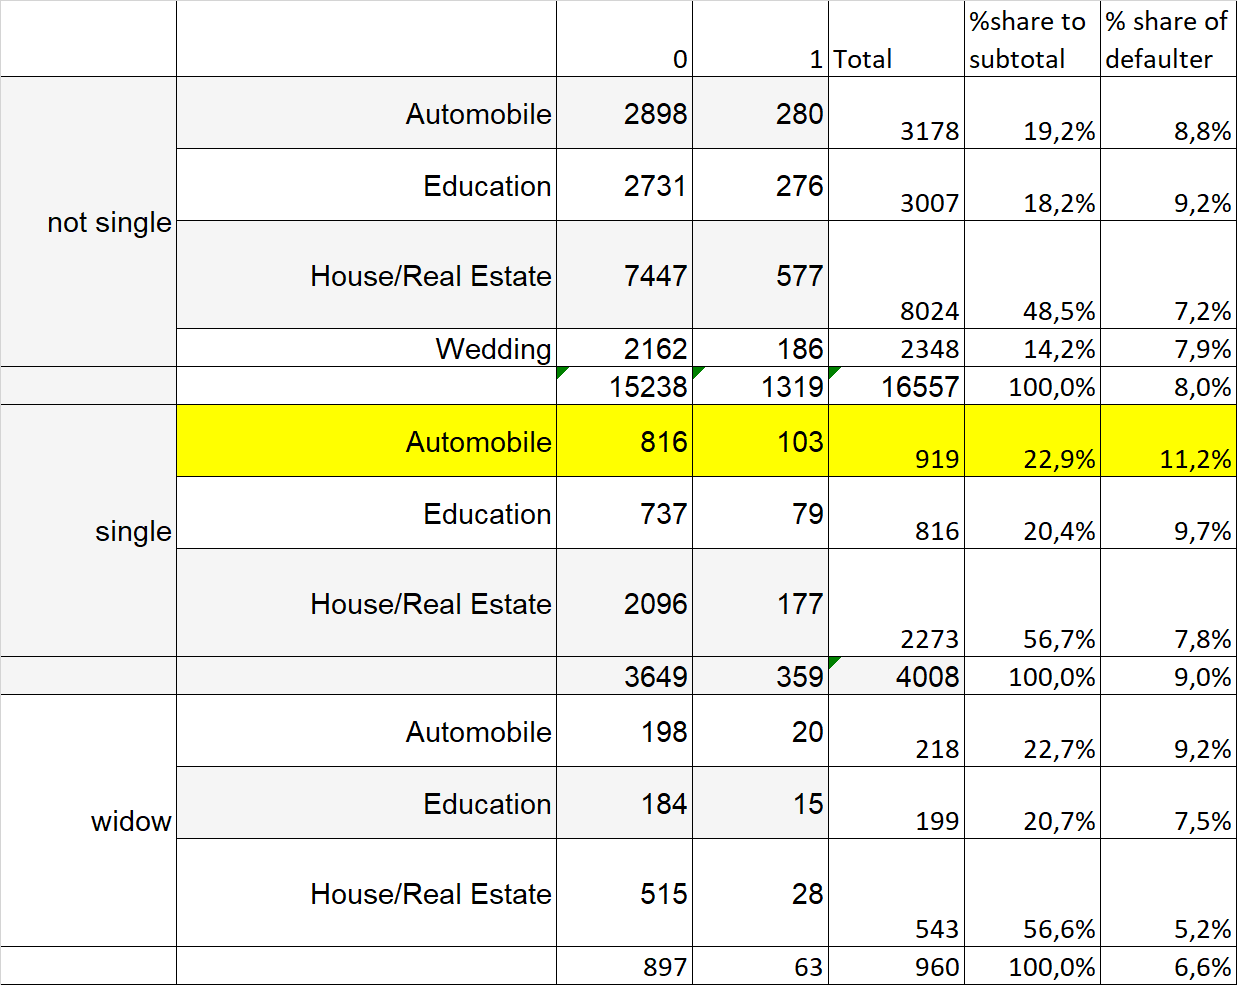

<div class="alert alert-danger">

### Comment

The same issue. 
</div>

In [84]:
credit_scoring.groupby('loan_purpose_1')['default_status'].mean()*100

loan_purpose_1
Automobile           9.378636
Education            9.240759
House/Real Estate    7.251484
Wedding              8.076422
Name: default_status, dtype: float64

<div class="alert alert-danger">
1. The chances of defaulting on the loan are higher when the loans are taken for automobile (9.3%) and education(9.2%)
2. The default percentage are lower than average of 8.1% for poeple who take loans for buying properties (7.2%) and wedding(7.9%)
3. From past data it can be seen that people tend to default more when loans are taken for automobile and education
</div>

<div class="alert alert-success">

### Comment 3

Well done!
   
</div>

<div class="alert alert-danger">

### Comment

Oh-uh. Soory, we dont need mix several metrics for one  ansver here. There are already exist the "loan_purpose_1" - column. Use it. Calculate % of debtors in each categories and describe differences ...thats it...
Ok, look one lifehack:
    
        credit_scoring.groupby('loan_purpose_1')['default_status'].mean()*100
    
  ... please, use it contruction for anvering all 4 questions
 
</div>

### Conclusion

1. Overall defaulting rate is around 8.1%. 
2. People with children are more likely to default on loan repayment. 
3. Peoplw who are single more often default on loans
4. For income leavels people with mid level income tend to default more on repaments
5. Highest loans are take for buying a property, defaulting is higher when loan is taken for buying automobile or paying for education. 


### Step 4. General conclusion

1. The data was a set of records for 21525 people.
2. Of which the data was missing for 4348 records. 
3. Each record provided details about a person's age, marital status, employment status, income level, whether they have had a loan before and whether they have defaulted earlier. The data also tells us what is the loan that the person is applying for. Apart from that the data contains details about the number of children the person has. 
4. Based on the data we were required to answer three questions what is the corelation between the chances of defaulting -
    a) Number of children
    b) marital status
    c) income level
    d) loan purpose
5. To prepare the data , the data was cleaned by removing the erroneous values, the missing values, and the duplicated data.
6. The first step was changing negative values in days_employment to positive values and correcting the very large values. 
7. Next we addressed the missing values in total income column. It was replaced by grouping the data by income type
8. We examined the 0 values in the age column, however did not replace it since these might have not been filled out by the customers to begin with 
9. The errorneous values in number of children was addressed.
10. Duplicates were dropped after processing the data. 
11. Certain observations regarding the data after cleaning the data:
    a. The data consisted of people who are married/partnership (77%), and without kids (66%). 
    b. Defaulting chances were observed to increase with the increase in the number of kids. 
    c. People with no kids had lower defaulter contribution than 8.1% , which is the defaulting population contribution to the total.
    d. Then when we observe the the default chances based on the marital status, it is observed that data is skewed towards married people, with 77% of the people being in some form of partnership. However when we check the chances of defaulting, it was observed that single people (9%) tend to default higher than single. 
    e. The data was categorized into 4 homogeonous groups of income level, and it was found that people with the higher and lower income levels were less likely to default on the loan repayment as against those with middle level income level
    f. 50% of the population wanted a loan for building a property. From past records it can be observed that people defaulted on repayments for automobile and education loan. However it is not clear whether the same people are looking to take the same loan. 
12. Therefore people who have lesser kids and married are generally more likely to payout the loans


<div class="alert alert-danger">

### Comment
    
The final conclusion, unfortunately, is not large enough. Customers (and they only read the output, they don't need the code) would be happy to see something more detailed and voluminous that they can read. Now for filling:

- what was our goal?
- what data did we have in our hands?
- how we processed / modified / worked with gaps and duplicates + reasoning on the appearance of duplicates / zeros / gaps / artifacts.
- general figures for the entire table. Average percentage of delinquency, which groups are more (for example, pensioners)
- answers to questions - in as much detail as possible for all groups with numbers and reasoning.
- and at the very end "what was the goal and how the answers to the questions will help to achieve this goal"
    
This is an approximate plan of the final output for any analytical project. I propose to add your own according to it and everything will be fine!
</div>

<div class="alert alert-success">

### Comment 2
    
Yeah, good big conclusion
</div>

### Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [ ]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.